In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore') 
import nltk 
from nltk.corpus import stopwords  
from wordcloud import WordCloud ,STOPWORDS 

In [2]:
import os
path = os.path.join(os.path.expanduser("~"), "Downloads")

os.chdir(path)

df = pd.read_csv("Sheet_1.csv",usecols=['response_id','class','response_text']) 
 


In [3]:
df.shape 

(80, 3)

In [4]:
df.head() 

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [5]:
df.isnull() 

,response_id,class,response_text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
75,False,False,False
76,False,False,False
77,False,False,False
78,False,False,False


In [6]:
df.isnull().sum() 

response_id      0
class            0
response_text    0
dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_id    80 non-null     object
 1   class          80 non-null     object
 2   response_text  80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [8]:
df.describe 

<bound method NDFrame.describe of     response_id        class  \
0    response_1  not_flagged   
1    response_2      flagged   
2    response_3      flagged   
3    response_4  not_flagged   
4    response_5  not_flagged   
..          ...          ...   
75  response_76  not_flagged   
76  response_77      flagged   
77  response_78  not_flagged   
78  response_79      flagged   
79  response_80  not_flagged   

                                        response_text  
0               I try and avoid this sort of conflict  
1   Had a friend open up to me about his mental ad...  
2   I saved a girl from suicide once. She was goin...  
3   i cant think of one really...i think i may hav...  
4   Only really one friend who doesn't fit into th...  
..                                                ...  
75  Now that I've been through it, although i'm no...  
76  when my best friends mom past away from od'ing...  
77  As a camp counselor I provide stability in kid...  
78  My now girlfriend

In [9]:
#conver to lower case 
df.loc[:,"response_text"]=df.response_text.apply(lambda x : str.lower(x))

In [10]:
df.head() 

,response_id,class,response_text
0,response_1,not_flagged,i try and avoid this sort of conflict
1,response_2,flagged,had a friend open up to me about his mental ad...
2,response_3,flagged,i saved a girl from suicide once. she was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,only really one friend who doesn't fit into th...


In [11]:
import re 
df["response_text"]=df.response_text.apply(lambda x : " ".join(re.findall('[\w]+',x))) 

In [12]:
df["response_text"] 

0                 i try and avoid this sort of conflict
1     had a friend open up to me about his mental ad...
2     i saved a girl from suicide once she was going...
3     i cant think of one really i think i may have ...
4     only really one friend who doesn t fit into th...
                            ...                        
75    now that i ve been through it although i m not...
76    when my best friends mom past away from od ing...
77    as a camp counselor i provide stability in kid...
78    my now girlfriend used to have serious addicti...
79    the one person i ever talked to it was because...
Name: response_text, Length: 80, dtype: object

In [13]:
#remove stop words 
stop = set(stopwords.words('english'))
df["new_response_text"]= df["response_text"].apply(lambda x : " ".join([word for word in x.split() if word not in (stop)]))


In [14]:
df.head() 

,response_id,class,response_text,new_response_text
0,response_1,not_flagged,i try and avoid this sort of conflict,try avoid sort conflict
1,response_2,flagged,had a friend open up to me about his mental ad...,friend open mental addiction weed taking life ...
2,response_3,flagged,i saved a girl from suicide once she was going...,saved girl suicide going swallow bunch pills t...
3,response_4,not_flagged,i cant think of one really i think i may have ...,cant think one really think may indirectly
4,response_5,not_flagged,only really one friend who doesn t fit into th...,really one friend fit categories therapist cal...


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag , word_tokenize   
wnl = WordNetLemmatizer()  


In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# download data once (not inside the function)
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    doc = []
    for word in text.split():
        lemma = lemmatizer.lemmatize(word)
        doc.append(lemma)
    return " ".join(doc)

# Apply to your DataFrame
df["lemmatized_text"] = df["new_response_text"].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rooknight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rooknight\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
df.head(5) 

,response_id,class,response_text,new_response_text,lemmatized_text
0,response_1,not_flagged,i try and avoid this sort of conflict,try avoid sort conflict,try avoid sort conflict
1,response_2,flagged,had a friend open up to me about his mental ad...,friend open mental addiction weed taking life ...,friend open mental addiction weed taking life ...
2,response_3,flagged,i saved a girl from suicide once she was going...,saved girl suicide going swallow bunch pills t...,saved girl suicide going swallow bunch pill ta...
3,response_4,not_flagged,i cant think of one really i think i may have ...,cant think one really think may indirectly,cant think one really think may indirectly
4,response_5,not_flagged,only really one friend who doesn t fit into th...,really one friend fit categories therapist cal...,really one friend fit category therapist call ...


In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')  # This returns a list
new_words = ['', 'Now', 'user', 'ct']

stop_words.extend(new_words)  # Use extend to add multiple items
print(stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [19]:
def remove_stopwords(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and tokenize
    words = re.findall(r'\b\w+\b', text)
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [20]:
df['cleaned_text'] = df['lemmatized_text'].apply(remove_stopwords)


In [21]:
df.head()

,response_id,class,response_text,new_response_text,lemmatized_text,cleaned_text
0,response_1,not_flagged,i try and avoid this sort of conflict,try avoid sort conflict,try avoid sort conflict,try avoid sort conflict
1,response_2,flagged,had a friend open up to me about his mental ad...,friend open mental addiction weed taking life ...,friend open mental addiction weed taking life ...,friend open mental addiction weed taking life ...
2,response_3,flagged,i saved a girl from suicide once she was going...,saved girl suicide going swallow bunch pills t...,saved girl suicide going swallow bunch pill ta...,saved girl suicide going swallow bunch pill ta...
3,response_4,not_flagged,i cant think of one really i think i may have ...,cant think one really think may indirectly,cant think one really think may indirectly,cant think one really think may indirectly
4,response_5,not_flagged,only really one friend who doesn t fit into th...,really one friend fit categories therapist cal...,really one friend fit category therapist call ...,really one friend fit category therapist call ...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [23]:
x = df.new_response_text  #count vectorizer is bag of words , converting text into numerical to developing model
y = df["class"]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train).toarray()
x_test_dtm = vect.transform(x_test)

In [24]:
#https://newbedev.com/train-model-fails-because-list-object-has-no-attribute-lower
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train)  
X_test_vectors_tfidf = tfidf_vectorizer.transform(x_test) 

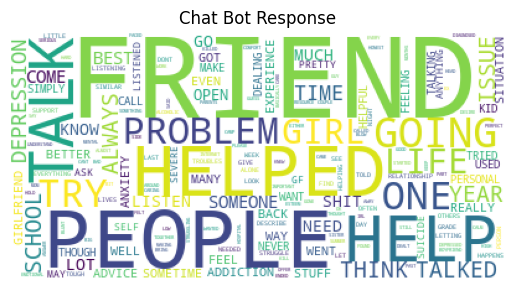

In [25]:
def cloud(text): # function to create wordcloud
    wordcloud = WordCloud(background_color="white").generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud) # Display the generated image:
    plt.axis("off")  # create a border  around the wordcloud
    plt.title("Chat Bot Response")
    
    
cloud(df['new_response_text']) 


In [26]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
accuracy_score(y_test, rf_predict)


0.75

In [34]:
import pickle
import os
print(os.path.getsize("chatbot_data.pkl"))  # Should be > 0

with open("chatbot_data.pkl", "wb") as file:
    pickle.dump(rf, file)

0


In [35]:
# Load the trained model
with open("chatbot_data.pkl", "rb") as file:
    loaded_rf = pickle.load(file)

In [37]:
loaded_rf.predict(x_test_dtm)   

array(['not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged'],
      dtype=object)

In [39]:


# Test loaded model
loaded_rf_predict = loaded_rf.predict(x_test_dtm)
print("Loaded model accuracy:", accuracy_score(y_test, loaded_rf_predict))


Loaded model accuracy: 0.75
